**BÀI TẬP THỰC HÀNH 1**

Xây dựng mô hình phân cụm K-means trên tập dữ liệu chim cánh cụt. Dữ liệu lấy tại
https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clusterin

1. Import thư viện và load dữ liệu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
penguins = sns.load_dataset('penguins')  # Có sẵn trong seaborn
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


2. Xây dựng mô hình K-Means

In [ ]:
# Drop rows with missing values
penguins_cleaned = penguins.dropna()

# Select the numerical features for clustering
X = penguins_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

display(X.head())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X_scaled[:5])

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       [-1.33556603,  1.0858774 , -0.56928439, -0.94160639],
       [-0.85941488,  1.74702554, -0.78365118, -0.69285199]])

In [ ]:
km_inertias = []
km_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia = km.inertia_
    score = silhouette_score(X_scaled, km.labels_)
    km_inertias.append(inertia)
    km_scores.append(score)
    print(f"k = {k} | Inertia = {inertia:.2f} | Silhouette Score = {score:.4f}")


k = 2 | Inertia = 552.67 | Silhouette Score = 0.5308
k = 3 | Inertia = 370.77 | Silhouette Score = 0.4462
k = 4 | Inertia = 305.43 | Silhouette Score = 0.4191
k = 5 | Inertia = 228.70 | Silhouette Score = 0.3740
k = 6 | Inertia = 200.60 | Silhouette Score = 0.3657
k = 7 | Inertia = 187.33 | Silhouette Score = 0.3541
k = 8 | Inertia = 167.14 | Silhouette Score = 0.2992
k = 9 | Inertia = 160.55 | Silhouette Score = 0.2645
k = 10 | Inertia = 155.83 | Silhouette Score = 0.2399


3. Tìm số cụm tối ưu cho mô hình K-Mean bằng phương pháp Elbow

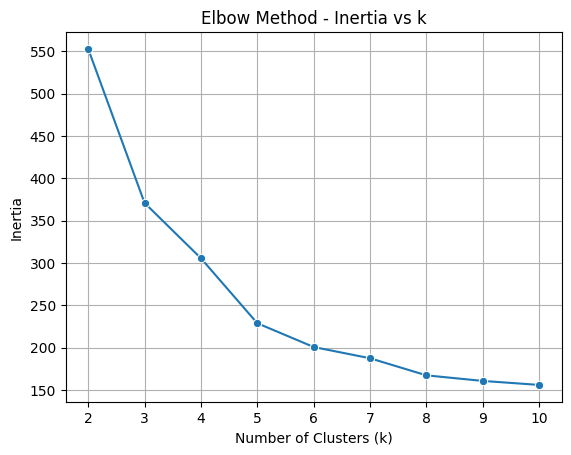

In [ ]:
sns.lineplot(x=range(2, 11), y=km_inertias, marker='o')
plt.title('Elbow Method - Inertia vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


4. Tìm số cụm tối ưu bằng phương pháp Silhoutte

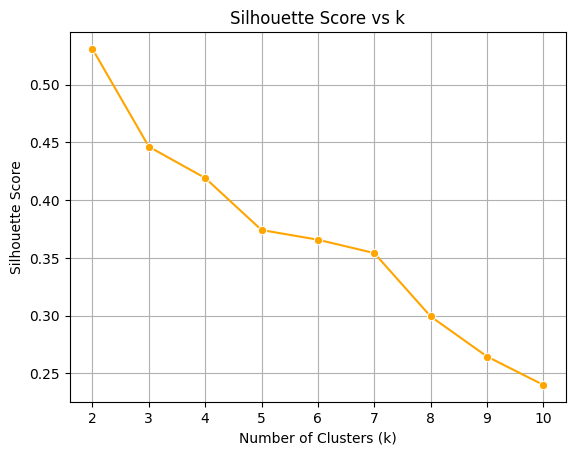

In [ ]:
sns.lineplot(x=range(2, 11), y=km_scores, marker='o', color='orange')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


5. Gán nhãn cho các mẫu dữ liệu dựa vào mô hình K-Means với số cụm là 3

In [ ]:
# Huấn luyện mô hình
km = KMeans(n_clusters=3, random_state=42)
penguins_cleaned['cluster'] = km.fit_predict(X_scaled)

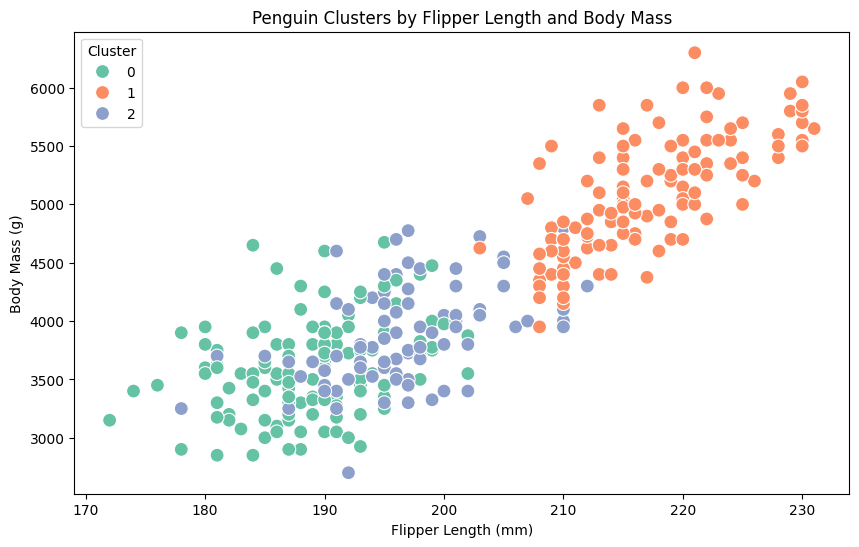

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins_cleaned, x='flipper_length_mm', y='body_mass_g', hue='cluster', palette='Set2', s=100)
plt.title('Penguin Clusters by Flipper Length and Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend(title='Cluster')
plt.show()

**BÀI TẬP THỰC HÀNH 2**

Xây dựng mô hình phân cụm K-means trên tập dữ liệu mua sắm tại siêu thị. Dữ liệu lấy tại
https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering

In [8]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx -O OnlineRetail.xlsx

--2025-10-14 09:01:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘OnlineRetail.xlsx’

OnlineRetail.xlsx       [   <=>              ]  22.62M  53.4MB/s    in 0.4s    

2025-10-14 09:01:20 (53.4 MB/s) - ‘OnlineRetail.xlsx’ saved [23715344]



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df = pd.read_excel('OnlineRetail.xlsx')
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df = df.dropna(subset=["CustomerID"])
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [11]:
import datetime as dt

# giả sử ngày mốc là ngày lớn nhất trong dữ liệu + 1 ngày
snapshot_date = df["InvoiceDate"].max() + dt.timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "Quantity": "sum",
    "UnitPrice": "sum"
})

# Tính Monetary: cách đầy đủ hơn là sum(Quantity * UnitPrice) theo từng hóa đơn
# tốt hơn làm như:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
monetary = df.groupby("CustomerID")["TotalPrice"].sum()

rfm = rfm.rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency"
})
rfm["Monetary"] = monetary


In [12]:
# giữ Monetary và Frequency trong khoảng dưới 99% percentile
quantile = rfm["Monetary"].quantile(0.99)
rfm = rfm[rfm["Monetary"] <= quantile]
# tương tự cho Frequency nếu cần


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])


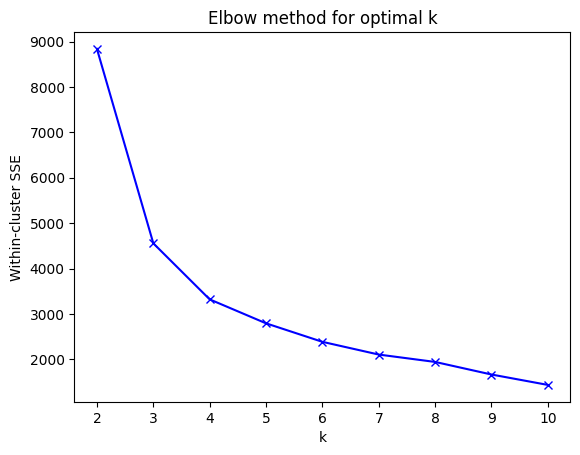

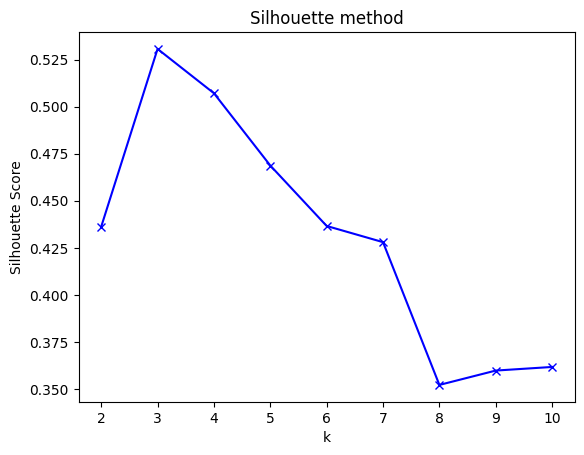

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

wss = []
silhouette = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    wss.append(km.inertia_)
    ss = silhouette_score(rfm_scaled, km.labels_)
    silhouette.append(ss)

# vẽ WSS (Elbow)
plt.plot(K, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster SSE')
plt.title('Elbow method for optimal k')
plt.show()

# vẽ silhouette
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette method')
plt.show()


In [15]:
k_optimal = 3  # giả sử
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)

rfm["Cluster"] = clusters


In [16]:
rfm.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": ["mean", "count"]
}).round(1)


Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         246.9       1.5    441.0  1075
1          19.5      16.5   7214.5   309
2          44.3       3.4   1153.4  2910

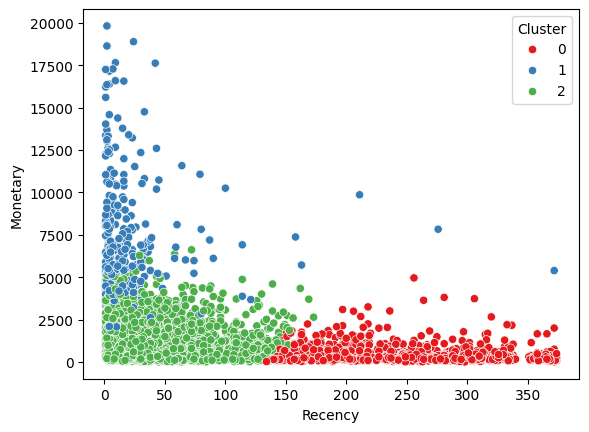

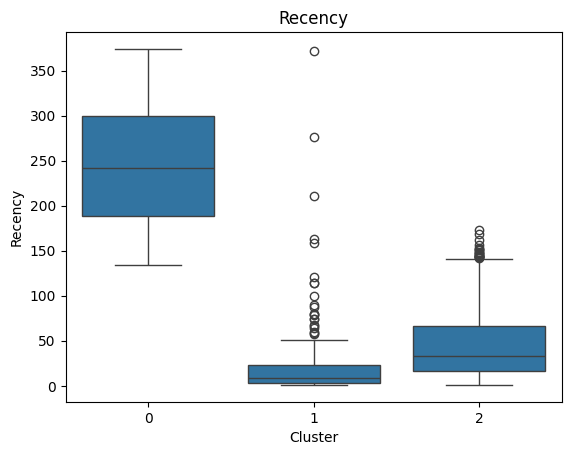

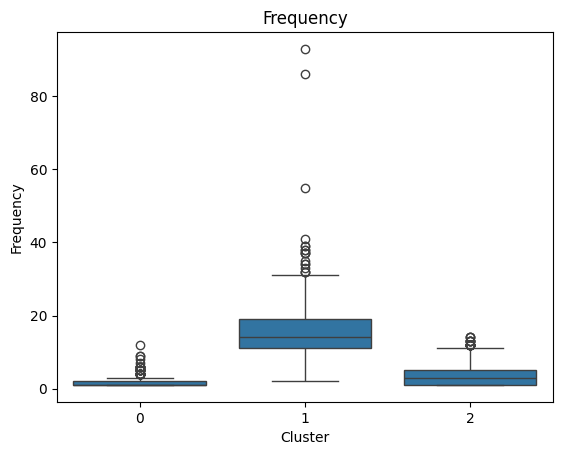

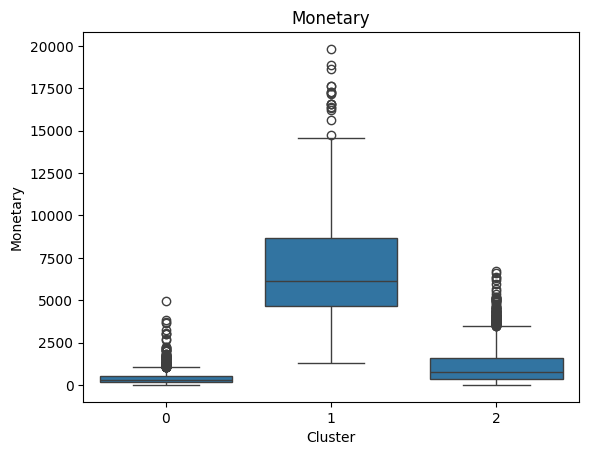

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Recency", y="Monetary", hue="Cluster", data=rfm, palette="Set1")
plt.show()

# boxplot
for col in ["Recency", "Frequency", "Monetary"]:
    sns.boxplot(x="Cluster", y=col, data=rfm)
    plt.title(col)
    plt.show()
